In [1]:
#import zipfile
#zip_ref = zipfile.ZipFile("seg_train.zip", 'r')
#zip_ref.extractall()
#zip_ref.close()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np

In [3]:
import tensorflow as tf
test_dir=r"C:\Users\moham\OneDrive\Desktop\Deep learning\seg_train"

In [4]:
import tensorflow.keras as keras
train=keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 14034 files belonging to 6 classes.


In [5]:
for images,labels in train.take(1):
    print(images.shape)
    print(labels.shape)
    

(32, 256, 256, 3)
(32,)


In [6]:
def process(image,label):
    image=image/255
    return image,label
train=train.map(process)

In [7]:
print(train)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
print(images)

tf.Tensor(
[[[[168.         185.         228.        ]
   [166.48438    183.48438    226.48438   ]
   [164.14062    181.14062    224.14062   ]
   ...
   [ 35.320312    28.320312    22.25      ]
   [ 73.99219     66.99219     59.75      ]
   [ 99.          92.          84.        ]]

  [[168.         185.         228.3789    ]
   [166.62794    183.62794    226.86328   ]
   [164.50621    181.50621    224.51953   ]
   ...
   [ 62.912384    56.29129     47.974182  ]
   [ 87.819305    81.19821     72.15326   ]
   [103.92578     97.30469     87.78906   ]]

  [[168.         185.         228.96484   ]
   [166.84996    183.84996    227.44922   ]
   [165.07155    182.07155    225.10547   ]
   ...
   [105.580536    99.54538     87.753845  ]
   [109.20145    103.16629     91.33356   ]
   [111.54297    105.50781     93.64844   ]]

  ...

  [[ 85.96484     95.03516     41.859375  ]
   [ 89.25511    100.206635    43.986282  ]
   [ 94.343155   108.203766    47.275314  ]
   ...
   [128.49268    128.281

In [9]:
print(labels)

tf.Tensor([3 1 3 3 1 1 5 0 2 1 3 2 5 2 2 2 0 3 2 1 3 3 4 0 4 1 2 3 2 4 0 0], shape=(32,), dtype=int32)


In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(1280,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Flatten()),
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
evl=model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
x=np.array(images)
y=np.array(labels)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
print(x_train.shape)
y_train.shape
x_train.shape
y_test.shape

(25, 256, 256, 3)


(7,)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,restore_best_weights=True)

In [16]:
history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2000 - loss: 6.5359 - val_accuracy: 0.1429 - val_loss: 216.5277
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2000 - loss: 248.7830 - val_accuracy: 0.2857 - val_loss: 240.9458
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2400 - loss: 315.1863 - val_accuracy: 0.2857 - val_loss: 157.5374
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2400 - loss: 203.3280 - val_accuracy: 0.0000e+00 - val_loss: 144.1404
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0800 - loss: 170.4298 - val_accuracy: 0.0000e+00 - val_loss: 74.5926
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1200 - loss: 80.2156 - val_accuracy: 0.1429 - val_loss: 51.0254
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1600 - loss: 45.8322 - val_accuracy: 0.1429 - val_loss: 32.4823
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2400 - loss: 23.7476 - val_accuracy: 0.1429 - val

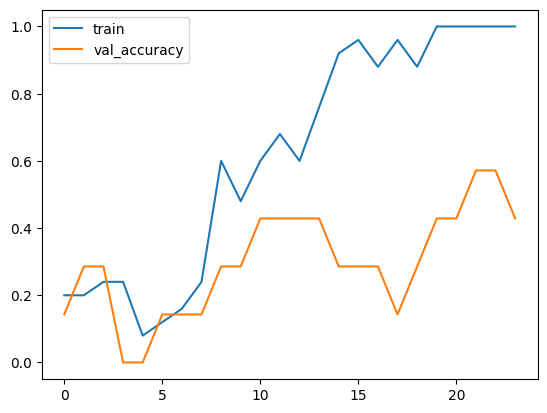

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


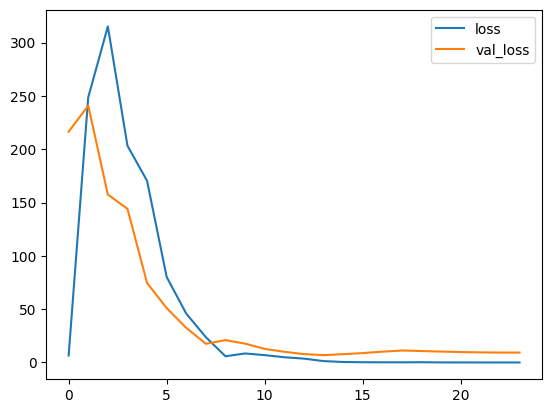

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_height = 256
img_width = 256
class_names = ['buildings','forest','glacier','mountain','sea','street']
img_path = r"pexels-pixabay-219837.jpg"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted emotion: mountain
Confidence: 22.74%
